In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from evaluate_prf1 import prf1_sweep

In [2]:
results_dir = "/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel"
# results_dir = "/home/lucas/Downloads/00_vio_6Hz/00_vio"
robots = ['sparkal1', 'sparkal2', 'acl_jackal', 'acl_jackal2', 'thoth', 'hathor']
line_styles = [':', '--', '-.']

In [3]:
%matplotlib widget

In [4]:
plt.close()

In [6]:
[x[0] for x in os.walk(results_dir)][1:]

['/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel/hathor_sparkal2',
 '/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel/hathor_thoth',
 '/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel/sparkal2_sparkal2',
 '/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel/thoth_thoth',
 '/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel/acl_jackal_thoth',
 '/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel/acl_jackal_acl_jackal',
 '/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel/hathor_hathor',
 '/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel/acl_jackal2_sparkal1',
 '/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel/acl_jackal_acl_jackal2',
 '/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel/acl_jackal2_hathor',
 '/home/lucas/Workspace/sparse_mapping/segment_track/align/03_voxel/acl_jackal_sparkal2',
 '/home/lucas/Workspace/sparse_mapp

00_evg


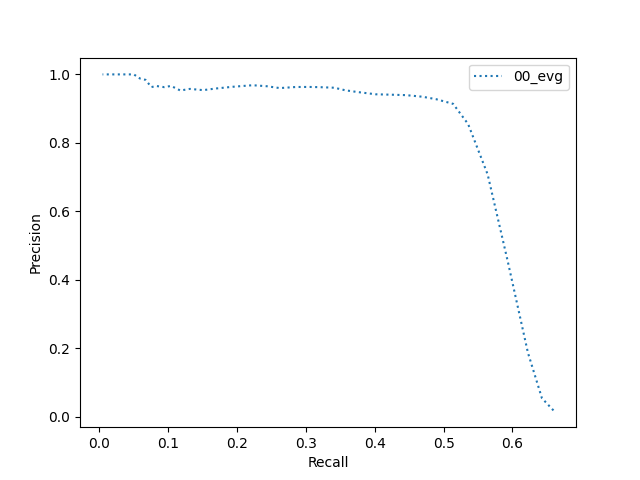

In [7]:
plt.close()
fig, ax = plt.subplots()
# methods = ["standard", "gravity", "distvol", "distvolgrav", "semantic", "semanticvol", "semanticgrav", "semanticvolgrav"]
methods = ["00_evg", "01_drift"]
# sub_dirs = ["sparkal1_sparkal2", "sparkal1_acl_jackal", "sparkal1_acl_jackal2", "sparkal2_acl_jackal", "sparkal2_acl_jackal2", "acl_jackal_acl_jackal2"]
sub_dirs = [x[0] for x in os.walk(results_dir)][1:]
req_err_ang = 5
req_err_dist = 2.5
req_overlap = 0.5
for i, method in enumerate(methods):
    try:
        # precisions, recalls, f1s, assoc_reqs = prf1_sweep([f"{results_dir}/{method}_mat"], req_overlap=req_overlap, req_err_ang=req_err_ang, req_err_dist=req_err_dist)
        # print([f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs])
        # precisions, recalls, f1s, assoc_reqs = prf1_sweep([f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs], req_overlap=req_overlap, req_err_ang=req_err_ang, req_err_dist=req_err_dist)
        precisions, recalls, f1s, assoc_reqs = prf1_sweep([f"{sub_dir}/{method}.pkl" for sub_dir in sub_dirs], req_overlap=req_overlap, req_err_ang=req_err_ang, req_err_dist=req_err_dist)
        print(method)
    except OSError as e:
        continue
    ax.plot(recalls, precisions, label=method, linestyle=line_styles[i % len(line_styles)])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend()
# plt.show()
# plt.savefig("/home/masonbp/figs/outdoor_global_loc_rss24/kmd_pr.pdf")
plt.show()
    